# Analysis of Variance(ANOVA) 

## ANOVA - Analysis of Variance
- Compares the means of 3(+) groups of data.
- Used to study if there is **statistical difference** between 3(+) group of data. 
- Assumes the data are **normally distributed** and have **equal variances**

### One-way ANOVA
- Compares the mean of 3(+) groups of data considering **one independent** variable or factor.
- Within each group there should be at least three observations.

## Two-way ANOVA
- Compares the means of 3(+) groups of data considering two independent variables or factors. 

### Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

### Interpretation

- H0: the means of the samples are equal.
- Ha: one or more of the means of the samples are unequal.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
sns.set(font_scale=2, palette= "viridis")
import researchpy as rp 

In [2]:
data = pd.read_csv('../data/pulse_data.csv')
data.head() 

,Height,Weight,Age,Gender,Smokes,Alcohol,Exercise,Ran,Pulse1,Pulse2,BMI,BMICat
0,1.73,57.0,18,Female,No,Yes,Moderate,No,86.0,88.0,19.045073,Underweight
1,1.79,58.0,19,Female,No,Yes,Moderate,Yes,82.0,150.0,18.101807,Underweight
2,1.67,62.0,18,Female,No,Yes,High,Yes,96.0,176.0,22.230987,Normal
3,1.95,84.0,18,Male,No,Yes,High,No,71.0,73.0,22.090730,Normal
4,1.73,64.0,18,Female,No,Yes,Low,No,90.0,88.0,21.383942,Normal


In [3]:
data.shape

(108, 12)

In [5]:
data['BMICat'].unique()

array(['Underweight', 'Normal', 'Overweight', 'Obese'], dtype=object)

In [6]:
data.groupby('BMICat')['Pulse1'].describe().T

BMICat,Normal,Obese,Overweight,Underweight
count,61.000000,2.000000,17.000000,27.00000
mean,75.245902,76.500000,73.411765,76.00000
std,14.269613,0.707107,10.338392,10.80954
min,47.000000,76.000000,49.000000,56.00000
25%,68.000000,76.250000,68.000000,70.00000
50%,75.000000,76.500000,76.000000,74.00000
75%,80.000000,76.750000,80.000000,84.00000
max,145.000000,77.000000,92.000000,104.00000


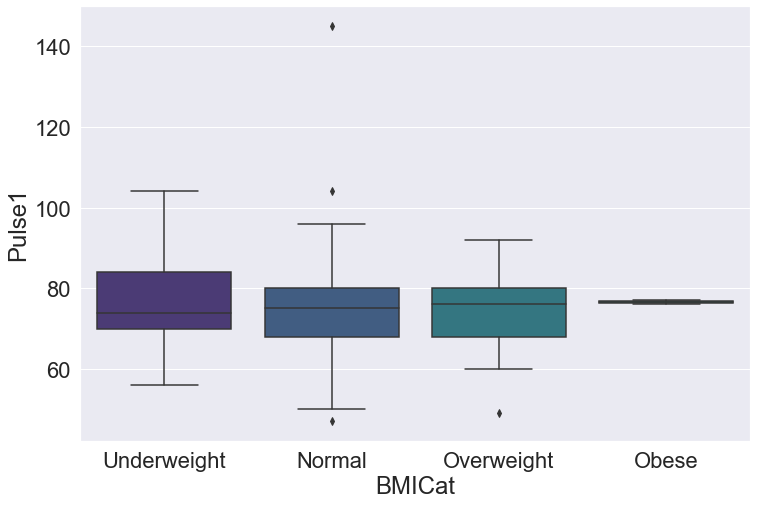

In [7]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data, x='BMICat', y='Pulse1')
plt.show() 

### One-way  ANOVA with `scipy.stats`

In [8]:
stats.f_oneway(data['Height'][data['Exercise'] == 'Low'],
               data['Height'][data['Exercise'] == 'Moderate'],
               data['Height'][data['Exercise'] == 'High'])

F_onewayResult(statistic=3.0725846725386963, pvalue=0.05048729781164558)

In [9]:
stat, p = stats.f_oneway(
              data['Height'][data['Exercise'] == 'Low'],
               data['Height'][data['Exercise'] == 'Moderate'],
               data['Height'][data['Exercise'] == 'High'])

print(f'statistic = {stat}, p-value = {p}')
# interpret
alpha = 0.05
if p > alpha:
    print('The means of the samples are equal.(fail to reject H0, not significant)')
else:
    print('The means of the samples are not equal(reject H0, significant)')

statistic = 3.0725846725386963, p-value = 0.05048729781164558
The means of the samples are equal.(fail to reject H0, not significant)


In [11]:
stat, p = stats.f_oneway(
              data['Height'][data['Exercise'] == 'Low'],
               data['Height'][data['Exercise'] == 'Moderate'],
               data['Height'][data['Exercise'] == 'High'])

print(f'statistic = {stat}, p-value = {p}')
# interpret
alpha = 0.05
if p > alpha:
    print('The means of the samples are equal.(fail to reject H0, not significant)')
else:
    print('The means of the samples are not equal(reject H0, significant)')

statistic = 3.0725846725386963, p-value = 0.05048729781164558
The means of the samples are equal.(fail to reject H0, not significant)


In [12]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [14]:
model = ols('Height ~ Exercise', data=data).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

            sum_sq     df         F    PR(>F)
Exercise  0.060604    2.0  3.072585  0.050487
Residual  1.035517  105.0       NaN       NaN


## Tukey's Honest Significance Difference
The test finds out which specific group's means compared with each other different

In [15]:
from statsmodels.stats.multicomp import MultiComparison 
mul_com = MultiComparison(data['Height'], data['Exercise'])
mul_result = mul_com.tukeyhsd()
print(mul_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2  meandiff p-adj   lower  upper  reject
-----------------------------------------------------
  High      Low  -0.0741 0.0509 -0.1485 0.0002  False
  High Moderate  -0.0394 0.3812 -0.1097 0.0309  False
   Low Moderate   0.0347 0.2312 -0.0154 0.0848  False
-----------------------------------------------------


In [15]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd 
tukey = pairwise_tukeyhsd(data['Height'], data['Exercise'], alpha=0.05)
# print summary 
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-0.0741,0.0509,-0.1485,0.0002,False
High,Moderate,-0.0394,0.3812,-0.1097,0.0309,False
Low,Moderate,0.0347,0.2312,-0.0154,0.0848,False


In [ ]:
# plot 
tukey.plot_simultaneous()
plt.vlines(x = 20, ymin=0.5, ymax=4.5)
plt.show() 

### Two-way ANOVA with `statsmodels`
https://www.statsmodels.org/stable/examples/notebooks/generated/interactions_anova.html

In [16]:
rp.summary_cont(data.groupby('Exercise'))['Pulse1']

,N,Mean,SD,SE,95% Conf.,Interval
Exercise,,,,,,
High,14,68.6429,12.6892,3.3913,61.3163,75.9694
Low,36,77.2222,9.3016,1.5503,74.0750,80.3694
Moderate,57,75.4737,14.1208,1.8703,71.7269,79.2204


In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data, x='Exercise', y = 'Pulse1')
plt.show() 

In [ ]:
rp.summary_cont(data.groupby('Exercise'))['Pulse2']

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data, x='Exercise', y = 'Pulse2')
plt.show() 

In [ ]:
# Two-way ANOVA 
model = ols('Pulse1 ~C(Exercise) + C(BMICat)', data=data).fit()
anova_result = sm.stats.anova_lm(model)
print(anova_result)